# Assignment 2
## Sungwon Lee
### 017473950

## 1. (3 pts) Implanting K-means clustering algorithm

In [118]:
# Import only basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm


df = pd.read_csv('cluster_data1.csv')
df.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [125]:
# define function that randomly choose a initial centroids
np.random.seed(123)
X = df.iloc[:,:2]


def init_centroids(X, k):
    idx = np.random.choice(X.shape[0], k, replace=False)
    centroids = X.iloc[idx]
    return np.array(centroids)

# Distance calculation
def distance(X, centroids):
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = norm(X - centroids[i], axis=1)
    return distances

# assign all the datapoints to the nearest centroid
def find_nearest_point(distances):
    nearest_centroid = np.argmin(distances, axis=1)
    return nearest_centroid

# update the new centroids
def update_centroids(X, nearest_centroid, k):
    new_cluster = np.zeros((k, X.shape[1]))
    for i in range(k):
        idx = np.where(nearest_centroid == i)
        pts = X.iloc[idx]
        new_cluster[i, :] = pts.mean()
        
    return new_cluster

# main function for iterating kmean algorithm
def kmeans(X, k, iteration, plot=True):
    

    
    centroids = init_centroids(X, k)


    # Perform clustering for 0th iteration
    distances = distance(X, centroids)
    nearest_centroid = find_nearest_point(distances)


    if plot:
        plt.figure(figsize=(8, 6))
    # Plot the clusters for 0 iteration
        for j in range(k):
            plt.scatter(X.iloc[nearest_centroid == j]['X1'], 
                        X.iloc[nearest_centroid == j]['X2'],
                        alpha=0.5,
                        label=f'Cluster {j + 1}')
    
        # Plot centroids for 0 iteration
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=50, label='Centroids (0 iteration)')
    
        plt.title('KMeans: initial setting')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.xlim(X['X1'].min() - 1, X['X1'].max() + 1)
        plt.ylim(X['X2'].min() - 1, X['X2'].max() + 1)
        plt.grid(True)
        plt.show()

    
    for i in range(iteration):
        distances = distance(X, centroids)

        nearest_centroid = find_nearest_point(distances)
        new_cluster = update_centroids(X, nearest_centroid, k)

        # unpdate centroid
        centroids = new_cluster
    
        if plot:
            # Clear the previous plot
            plt.clf()
            
            # Plot each cluster
            for j in range(k):
                plt.scatter(X.iloc[nearest_centroid == j]['X1'], 
                            X.iloc[nearest_centroid == j]['X2'],
                            alpha=0.5,
                            label=f'Cluster {i + 1}')
    
            # Plot centroids
            plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=50, label='Centroids')
            
            plt.title(f'KMeans of Iteration {i+1}')
            plt.xlabel('X1')
            plt.ylabel('X2')
            plt.legend()
            plt.xlim(X['X1'].min() - 1, X['X1'].max() + 1)
            plt.ylim(X['X2'].min() - 1, X['X2'].max() + 1)
            plt.grid(True)
            plt.show() 
            
    return centroids

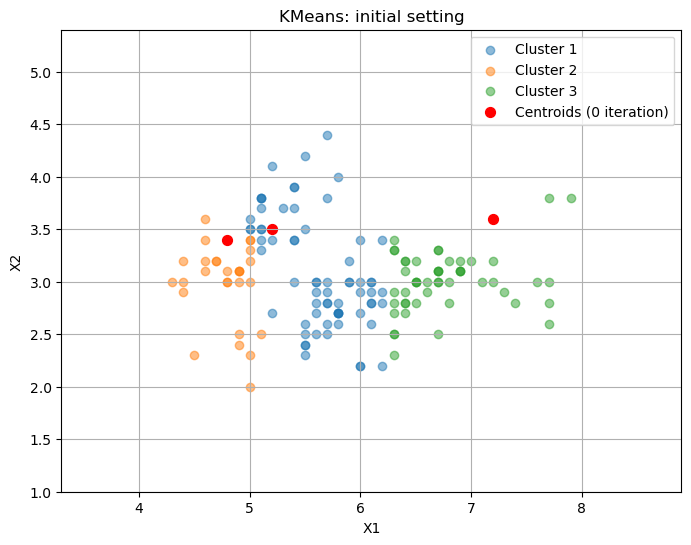

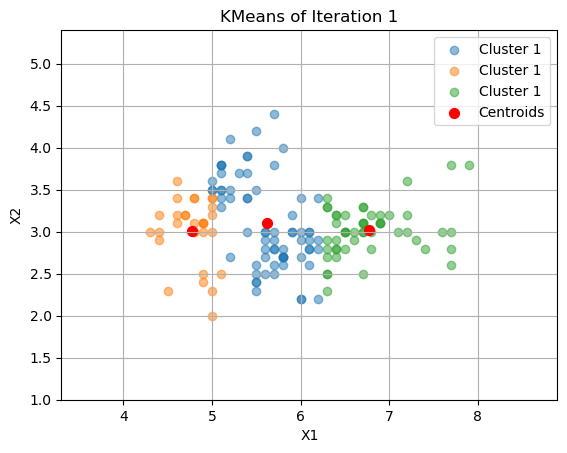

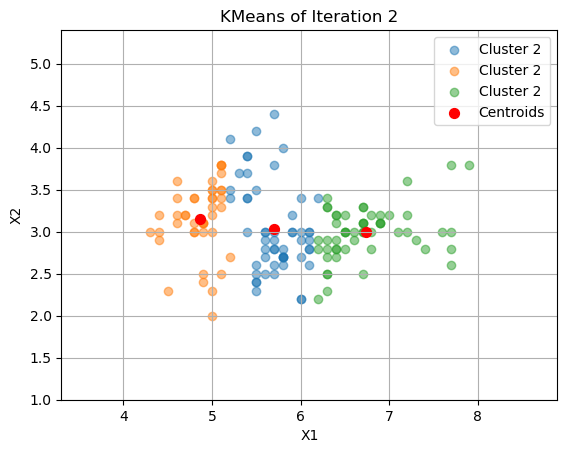

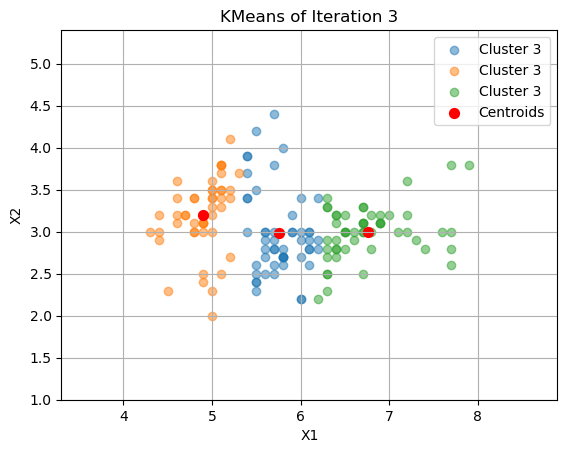

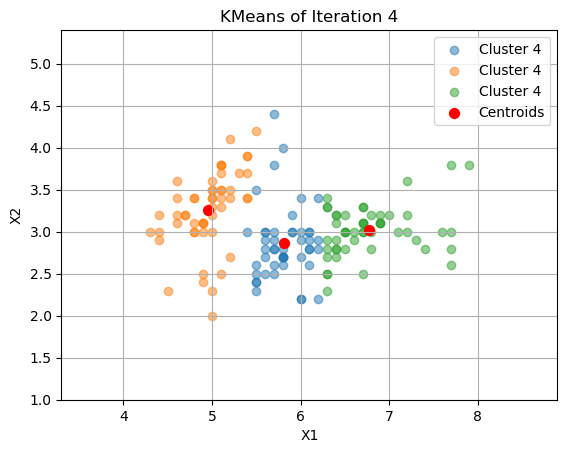

array([[5.81489362, 2.86382979],
       [4.95576923, 3.26153846],
       [6.7745098 , 3.01764706]])

In [127]:
np.random.seed(123)
kmeans(X, 3, 4, plot=True)

# 2. (3 pts) Implanting K-means++ clustering algorithm and finding K

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kmeans_plus_plus_init(X, k):
    
    # Choose initial cluster randomly
    centroids = []
    init_centroid_idx = np.random.choice(X.index)
    centroids.append(X.iloc[init_centroid_idx].values)
    
    for _ in range(1, k):
        # Compute the distance
        distances = np.min([np.linalg.norm(X.values - centroid, axis=1) for centroid in centroids], axis=0)
        
        # Choose the longest distance cluster
        next_centroid_idx = np.argmax(distances)
        centroids.append(X.iloc[next_centroid_idx].values)

    return np.array(centroids)

# Distance calculation
def distance(X, centroids):
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = norm(X - centroids[i], axis=1)
    return distances



# assign all the datapoints to the nearest centroid
def find_nearest_point(distances):
    nearest_centroid = np.argmin(distances, axis=1)
    return nearest_centroid
    
# update the new centroids
def update_centroids(X, nearest_centroid, k):
    new_cluster = np.zeros((k, X.shape[1]))
    for i in range(k):
        idx = np.where(nearest_centroid == i)
        pts = X.iloc[idx]
        new_cluster[i, :] = pts.mean()
        
    return new_cluster

# Main KMeans function
def kmeans_plus(X, k, max_iter, plot=True):
    centroids = kmeans_plus_plus_init(X, k)
    

    # Plot the initial setting of centroids
    distances = distance(X, centroids)
    nearest_centroid = find_nearest_point(distances)

    if plot:
        plt.figure(figsize=(8, 6))
    
        for j in range(k):
            plt.scatter(X.iloc[nearest_centroid == j]['X1'], 
                        X.iloc[nearest_centroid == j]['X2'],
                        alpha=0.5,
                        label=f'Cluster {j + 1}')
    
        # Plot the initial centroids
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=50, label='Centroids (0 iteration)')
    
        plt.title('KMeans++: Initial Setting')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.xlim(X['X1'].min() - 1, X['X1'].max() + 1)
        plt.ylim(X['X2'].min() - 1, X['X2'].max() + 1)
        plt.grid(True)
        plt.show()

    for i in range(1, max_iter + 1):

        distances = distance(X, centroids)
        nearest_centroid = find_nearest_point(distances)

        centroids = update_centroids(X, nearest_centroid, k)

        if plot:
            plt.clf()
    
            for j in range(k):
                plt.scatter(X.iloc[nearest_centroid == j]['X1'], 
                            X.iloc[nearest_centroid == j]['X2'],
                            alpha=0.5,
                            label=f'Cluster {j + 1}')
    
            # Plot the updated centroids
            plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=50, label=f'Centroids (Iteration {i})')
            
            plt.title(f'KMeans++: Iteration {i}')
            plt.xlabel('X1')
            plt.ylabel('X2')
            plt.legend()
            plt.xlim(X['X1'].min() - 1, X['X1'].max() + 1)
            plt.ylim(X['X2'].min() - 1, X['X2'].max() + 1)
            plt.grid(True)
    
            plt.show()

    return centroids, nearest_centroid

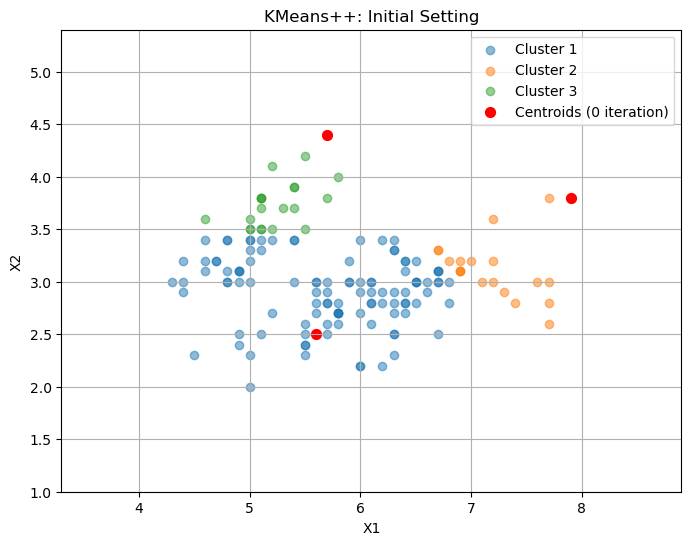

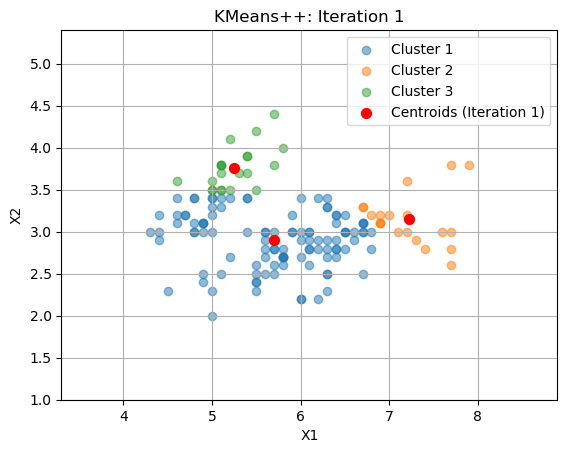

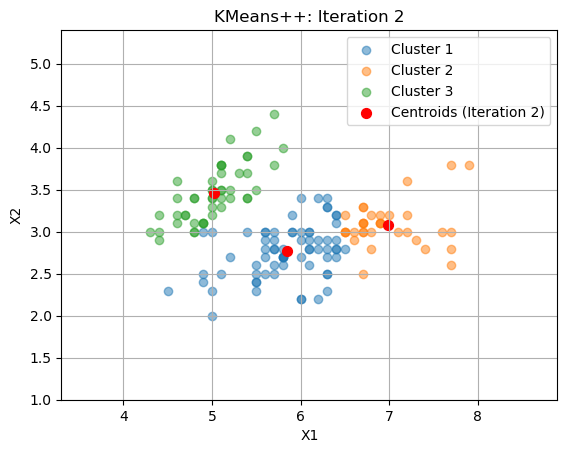

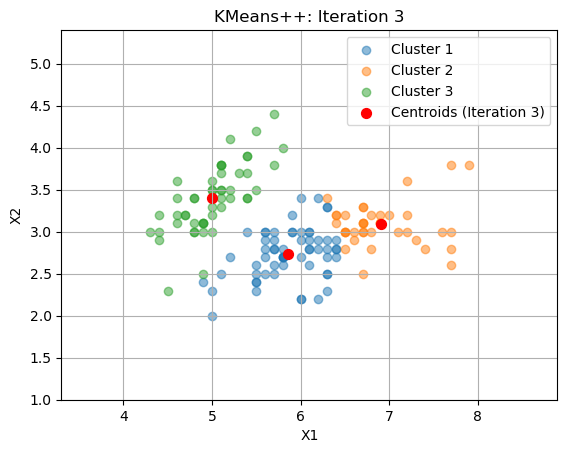

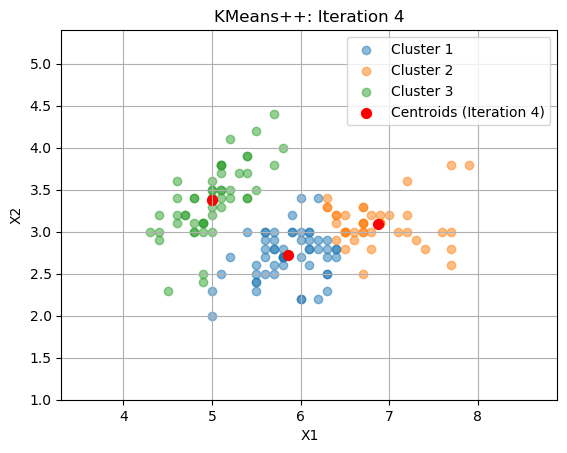

Centroid: [[5.85535714 2.72142857]
 [6.86904762 3.09285714]
 [5.00192308 3.38076923]]
 Labels: [1 0 0 1 0 1 1 2 2 2 0 0 2 1 0 2 2 1 2 2 1 0 0 2 1 2 0 2 2 0 1 2 2 2 1 0 0
 1 2 0 2 2 2 0 2 1 2 2 0 0 0 0 0 0 0 0 2 0 2 2 1 1 0 0 2 1 2 0 2 2 2 1 2 1
 2 0 0 1 0 0 2 2 1 1 1 1 2 0 0 0 2 2 0 1 1 1 1 0 0 0 0 1 1 2 1 0 1 0 0 0 2
 1 2 1 2 1 0 1 1 1 2 1 0 1 0 2 2 0 0 0 2 2 1 0 1 0 0 2 2 0 0 1 0 1 0 2 2 0
 2 2]


In [146]:
k = 3  
iterations = 4  

np.random.seed(123)
centroid, labels = kmeans_plus(X, k, 4, plot=True)
print(f"Centroid: {centroid}\n Labels: {labels}")

## 3. (4 pts) Implanting KNN classification

In [153]:
import pandas as pd

df2 = pd.read_csv("cluster_data2.csv")
df2.head()

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05


In [155]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

def knn(new_points, X_train, y_train, k):
    predictions = []
    
    for i in new_points:
        # Calculate distances between the new point and all the training points
        distances = np.linalg.norm(X_train - i, axis=1)
        
        # Find the indices of the k-nearest neighbors
        k_nearest_indices = distances.argsort()[:k]
        
        # Find the classes of these neighbors
        k_nearest_labels = y_train[k_nearest_indices]
        
        # Assign the class that appears most frequently
        unique, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_class = unique[np.argmax(counts)]
        predictions.append(predicted_class)
    
    return np.array(predictions)

Predicted classes for the new data points:
[2 2 0 0 1 0 2 1 2 1 0 1 2 1 0]


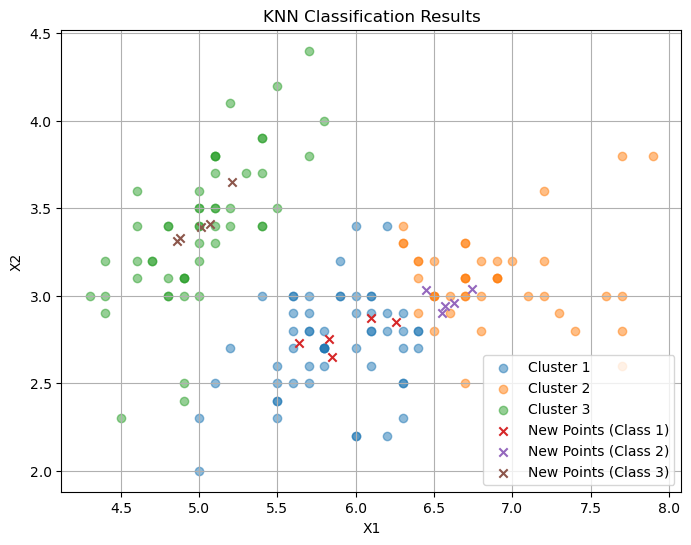

In [156]:
# Loading the new dataset for classification (cluster_data2.csv)
df2 = pd.read_csv('cluster_data2.csv')

# Assuming cluster_data1.csv is the same data used in K-means++
# Let's assume `centroids` and `nearest_centroid` are the results from your K-means++ algorithm
# X_train would be the features from cluster_data1.csv, and y_train would be the cluster labels (nearest_centroid)

# For example, X_train might look like this if cluster_data1.csv has X1 and X2:
X_train = X[['X1', 'X2']].values  # Features from cluster_data1.csv
y_train = labels         # Cluster labels from K-means++

# For KNN, we need to classify the new points from cluster_data2.csv
X_test = df2[['X1', 'X2']].values  # Assuming we are using only X1 and X2 features from cluster_data2.csv

# Apply KNN to classify the new points
k = 3  # Number of neighbors
predicted_classes = knn(X_test, X_train, y_train, k)

# Output the classification result
print("Predicted classes for the new data points:")
print(predicted_classes)

# Visualize the classification result
plt.figure(figsize=(8, 6))

# Plot training points (cluster_data1)
for j in range(np.unique(y_train).size):
    plt.scatter(X_train[y_train == j][:, 0], X_train[y_train == j][:, 1], alpha=0.5, label=f'Cluster {j+1}')

# Plot new points (cluster_data2) with their predicted classes
for i, cls in enumerate(np.unique(predicted_classes)):
    plt.scatter(X_test[predicted_classes == cls][:, 0], X_test[predicted_classes == cls][:, 1], 
                marker='x', label=f'New Points (Class {cls+1})')

plt.title('KNN Classification Results')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()